In [72]:
from langchain_core.messages import AIMessage, HumanMessage,AnyMessage

messages = [AIMessage(content="How can I help you?",name="Model")]
messages.append(HumanMessage(content="tell me whats the time now?",name="Bilal"))
messages.append(AIMessage(content="The current time depends on your timezone, but as of now, the UTC time is 2024-12-08 08:05:18 UTC.",name="Model"))
messages.append(HumanMessage(content="Whats the time in Pakistan?",name="Bilal"))
messages.append(AIMessage(content="Time in Pakistan: 2024-12-08 13:05:18 (1:05 PM).",name="Model"))
messages.append(HumanMessage(content="Thanks and don't response me again.",name="Bilal"))

In [2]:
for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

How can I help you?
================================ Human Message =================================
Name: Bilal

tell me whats the time now?
================================== Ai Message ==================================
Name: Model

The current time depends on your timezone, but as of now, the UTC time is 2024-12-08 08:05:18 UTC.
================================ Human Message =================================
Name: Bilal

Whats the time in Pakistan?
================================== Ai Message ==================================
Name: Model

Time in Pakistan: 2024-12-08 13:05:18 (1:05 PM).
================================ Human Message =================================
Name: Bilal

Thanks and don't response me again.


In [4]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")

In [6]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-3.5-turbo")
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [7]:
result

AIMessage(content="You're welcome! If you have any more questions in the future, feel free to ask. Goodbye!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 124, 'total_tokens': 146, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-7f49138b-7493-4fcb-85fb-c19e90c56a30-0', usage_metadata={'input_tokens': 124, 'output_tokens': 22, 'total_tokens': 146, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
result.pretty_print()

================================== Ai Message ==================================

You're welcome! If you have any more questions in the future, feel free to ask. Goodbye!


**tool call**

In [56]:
# define a function
def multiply_numbers(a:int,b:int) -> int:
    return a*b*2 
def powerer(a:int,b:int) -> int:
    return a**b 

In [43]:
multiply_numbers(3,4)

24

In [57]:
llm_with_tools = llm.bind_tools([multiply_numbers,powerer])

In [31]:
tool_call = llm.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Bilal")])
tool_call

AIMessage(content='2 multiplied by 3 equals 6.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 18, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-4313db11-29b8-4936-a279-ac2b22da037a-0', usage_metadata={'input_tokens': 18, 'output_tokens': 9, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [32]:
tool_call.pretty_print()

================================== Ai Message ==================================

2 multiplied by 3 equals 6.


In [62]:
llm_with_tools_call = llm_with_tools.invoke([HumanMessage("Whats the 2 power 3?",name ="Bilal")])

In [63]:
llm_with_tools_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w9fU8jTmIytrlIl7QUDZJ2TX', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'powerer'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 70, 'total_tokens': 88, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-49964adf-1170-4646-8ea7-be0c09042036-0', tool_calls=[{'name': 'powerer', 'args': {'a': 2, 'b': 3}, 'id': 'call_w9fU8jTmIytrlIl7QUDZJ2TX', 'type': 'tool_call'}], usage_metadata={'input_tokens': 70, 'output_tokens': 18, 'total_tokens': 88, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [60]:
llm_with_tools_call.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply_numbers (call_cOTKq5orZva08MevOBN1Mp9A)
 Call ID: call_cOTKq5orZva08MevOBN1Mp9A
  Args:
    a: 3
    b: 2


**Message as a state**

In [70]:
from typing import TypedDict,List,Annotated
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
    messages:Annotated[List[AnyMessage],add_messages]

In [71]:
# Alternative
from langgraph.graph import MessageState

class MessageState(MessageState):
    pass




In [73]:
messages

[AIMessage(content='How can I help you?', additional_kwargs={}, response_metadata={}, name='Model'),
 HumanMessage(content='tell me whats the time now?', additional_kwargs={}, response_metadata={}, name='Bilal'),
 AIMessage(content='The current time depends on your timezone, but as of now, the UTC time is 2024-12-08 08:05:18 UTC.', additional_kwargs={}, response_metadata={}, name='Model'),
 HumanMessage(content='Whats the time in Pakistan?', additional_kwargs={}, response_metadata={}, name='Bilal'),
 AIMessage(content='Time in Pakistan: 2024-12-08 13:05:18 (1:05 PM).', additional_kwargs={}, response_metadata={}, name='Model'),
 HumanMessage(content="Thanks and don't response me again.", additional_kwargs={}, response_metadata={}, name='Bilal')]

In [76]:
new_message = [AIMessage(content='Thanks for trusting me?', name='Model')]

add_messages(messages,new_message)

[AIMessage(content='How can I help you?', additional_kwargs={}, response_metadata={}, name='Model', id='22e7fd2e-b2aa-40c6-a716-0bc4c1353b09'),
 HumanMessage(content='tell me whats the time now?', additional_kwargs={}, response_metadata={}, name='Bilal', id='9d76ab5b-7373-4f0c-ac40-d3d9316d8e2f'),
 AIMessage(content='The current time depends on your timezone, but as of now, the UTC time is 2024-12-08 08:05:18 UTC.', additional_kwargs={}, response_metadata={}, name='Model', id='4eee32bd-9634-4a3a-b307-2d65bb28a65d'),
 HumanMessage(content='Whats the time in Pakistan?', additional_kwargs={}, response_metadata={}, name='Bilal', id='9f399c43-663f-4289-9b4b-211ff177ab5d'),
 AIMessage(content='Time in Pakistan: 2024-12-08 13:05:18 (1:05 PM).', additional_kwargs={}, response_metadata={}, name='Model', id='cf1af688-8beb-421c-8fe7-6ba474f3b1f6'),
 HumanMessage(content="Thanks and don't response me again.", additional_kwargs={}, response_metadata={}, name='Bilal', id='4e997b32-eac1-4acc-b3d8-123

**Create a Graph**

In [80]:
from langgraph.graph import START,END,StateGraph
from IPython.display import display, Image

def tool_call_function(state:MessageState):
    return {"message": [llm_with_tools.invoke(state.get("messages",[]))] }


builder = StateGraph(MessageState)
builder.add_node("tool_call_function",tool_call_function)

builder.add_edge(START, "tool_call_function")
builder.add_edge("tool_call_function",END)

graph = builder.compile()

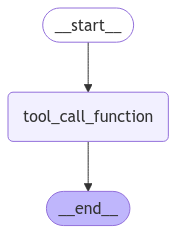

In [81]:
display(Image(graph.get_graph().draw_mermaid_png()))